In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [2]:
# PARAMETROS
VALIDATION_SPLIT = 0.15

# RUTA DE DATASET MS
DATASET_MS = '../dataset/ms/dataset-ms.xlsx'

In [3]:
# CARGA DE DATOS HOJA TRAIN
train_ds = pd.read_excel(DATASET_MS, sheet_name='train')

In [4]:
# DIVISION DE DATOS DE ENTRADA (X) Y SALIDA (y)
X = train_ds.iloc[:, :-1] 
y = train_ds.iloc[:, -1]

In [5]:
# DIVIDIMOS EL DATASET EN ENTRENAMIENTO Y VALIDACION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VALIDATION_SPLIT, random_state=42 , stratify=X['ResistenciaEsperada'])

In [6]:
print('Cantidad de datos de entrenamiento: ', len(X_train))
print('Cantidad de datos de validación: ', len(X_val))

Cantidad de datos de entrenamiento:  286
Cantidad de datos de validación:  51


In [7]:
# MODELO LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, 6)))
model.add(Dense(1))

In [8]:
# COMPILACION DEL MODELO
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# ENTRENAMIENTO DEL MODELO
history = model.fit(
  X_train.values.reshape(-1, 1, 6), 
  y_train.values.reshape(-1, 1, 1), 
  epochs=1000, 
  validation_data=(X_val.values.reshape(-1, 1, 6), y_val.values.reshape(-1, 1, 1))
)

Epoch 1/1000
9/9 [==============================] - 2s 57ms/step - loss: 266587616.0000 - val_loss: 275636096.0000
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 266567344.0000 - val_loss: 275620896.0000
Epoch 3/1000
9/9 [==============================] - 0s 6ms/step - loss: 266555136.0000 - val_loss: 275611232.0000
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 266546480.0000 - val_loss: 275604032.0000
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 266541072.0000 - val_loss: 275599648.0000
Epoch 6/1000
9/9 [==============================] - 0s 6ms/step - loss: 266536832.0000 - val_loss: 275595424.0000
Epoch 7/1000
9/9 [==============================] - 0s 5ms/step - loss: 266532672.0000 - val_loss: 275591264.0000
Epoch 8/1000
9/9 [==============================] - 0s 5ms/step - loss: 266528560.0000 - val_loss: 275587104.0000
Epoch 9/1000
9/9 [==============================] - 0s 6ms/step - loss: 266524432.0000 

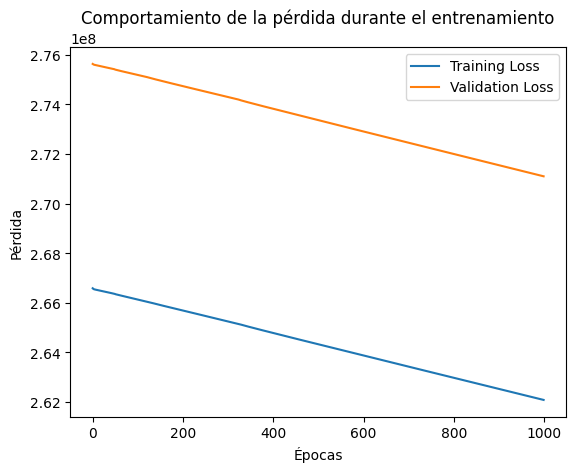

In [10]:
# Mostrar el comportamiento de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Comportamiento de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [22]:
# ESCOGEMOS LA PRIMER FILA DE X_val
X_test = X_val.iloc[5, :].values.reshape(-1, 1, 6)
print('X_test: ', X_test)

X_test:  [[[280 393 239 864 867  28]]]


In [27]:
# Hacer predicciones
prediction = model.predict(X_test)
print('Predicción: ', prediction)

1/1 [==============================] - 0s 25ms/step
Predicción:  [[153.02763]]
